<a href="https://colab.research.google.com/github/ericheichert/ericheichert.github.io/blob/master/project_image_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Image Manipulation

[![Open In Colab <](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ShawnHymel/computer-vision-with-embedded-machine-learning/blob/master/1.1.5%20-%20Project%20-%20Loading%20and%20Manipulating%20Images/project_image_manipulation.ipynb)

Welcome to your first project in the Computer Vision with Embedded Machine Learning course! Follow along with the project prompts to complete this project. Press 'shift + enter' to run a cell.

Author: EdgeImpulse, Inc.<br>
Date: July 30, 2021<br>
License: [Apache-2.0](apache.org/licenses/LICENSE-2.0)<br>

In [1]:
### Example: Try running this cell. Press 'shift + enter'.

var = 1 + 2
print("Answer:", var)

Answer: 3


Google Colab runs Jupyter Notebook, which is a web-based client application that allows you to run code (Python in this case) on a server. Similar to an interactive Python console, you can run pieces of code (stored in "cells") at a time rather than running (and debugging) an entire program.

Variables are saved between cells, unless you select *Runtime > Restart Runtime* to delete all your stored variables. You'll need to run all of your cells again if you do that.

If you need help with Jupyter Notebook, you can read the documentation here: https://jupyter-notebook.readthedocs.io/en/stable/

If this is your first time using Colab, I recommend reading through this [getting start guide](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm).

## Part 1: Load an Image

On the left side of Colab, click the folder icon. Click the upload icon and select one of your captured dataset images.

In [5]:
### You will likely need these libraries

import os
from PIL import Image

You might need to use the `os.path.join()` function to create a string that points to the location of your image. You can read more about it here: https://docs.python.org/3/library/os.path.html#os.path.join

There are a few ways to open an image in Python. I recommend using the Image module in the PIL package to do that. You can read about the Image module here: https://pillow.readthedocs.io/en/stable/reference/Image.html. You will also need to use the `Image.convert()` function to convert the image to grayscale (documentation found on that same page).

In [28]:
### Open image and convert to grayscale.

# Placeholder--you need to save the grayscale image in the 'img' variable
img = None
img_path = "/content/4.png"

# >>> ENTER YOUR CODE HERE <<<
with Image.open(img_path) as im:
    img = im.convert('L')

We can preview the image using the `imshow()` function as part of the matplotlib library. You can read about it here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html

In [29]:
### Load the pyplot module (from matplotlib)

import matplotlib.pyplot as plt

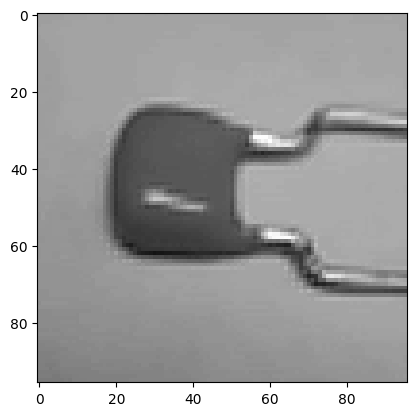

In [30]:
### View the image

# At this point, your image should be loaded and saved in the 'img' variable. Let's view it.
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

## Part 2: Convert Image to Numpy Array

PIL Image objects are useful for some object manipulation, but to really get our hands dirty, we want to convert everything to numerical arrays. We'll use Numpy to work with such arrays.

Numpy is a powerful Python library that allows us to efficiently work with multi-dimensional arrays. If this is your first time using Numpy, I recommend reading through this tutorial (try running some of the commands!): https://towardsdatascience.com/getting-started-with-numpy-59b22df56729

In [27]:
### We'll obviously need the Numpy package

import numpy as np

I recommend using the `asarray()` function in Numpy to conver the PIL Image object. You can read about it here: https://numpy.org/doc/stable/reference/generated/numpy.asarray.html

In [31]:
### Convert the Image object to a Numpy array

# Save your Numpy array in the 'img_array' variable
img_array = None

# >>> ENTER YOUR CODE HERE <<<
img_array = np.asarray(img)

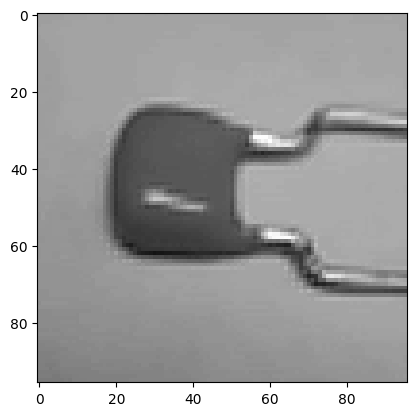

In [36]:
### View the array as an image

# At this point, your image should be saved as a Numpy array in the 'img_array' variable
plt.imshow(img_array, cmap='gray', vmin=0, vmax=255)

In [42]:
### View details about the array: print the shape, entire array, first row, and first column
# Note that Python may leave out some values when printing the entire array.
# Make sure that the first row and first column look correct!

# >>> ENTER YOUR CODE HERE <<<
print('shape = "{npshape}"'.format(npshape=img_array.shape))
print("Entire array:\n", img_array)
print("First row:\n", img_array[0])
print("First column:\n", img_array[:, 0])

shape = "(96, 96)"
Entire array:
 [[158 158 158 ... 164 164 164]
 [158 158 158 ... 163 163 163]
 [158 158 158 ... 164 164 164]
 ...
 [124 124 124 ... 150 150 150]
 [125 125 125 ... 152 149 152]
 [122 122 122 ... 149 149 149]]
First row:
 [158 158 158 158 158 158 158 161 161 161 161 161 161 163 163 163 163 163
 161 161 163 163 163 163 163 163 163 163 161 161 161 163 163 161 163 163
 163 163 163 163 163 163 164 164 164 164 164 164 163 163 163 163 163 163
 163 163 163 163 163 163 163 163 164 164 164 164 164 164 164 164 164 164
 163 163 163 166 166 166 166 166 166 166 164 164 164 164 164 164 164 164
 164 164 164 164 164 164]
First column:
 [158 158 158 158 161 161 158 158 158 158 158 158 158 158 158 158 158 158
 158 157 157 158 158 158 157 157 157 157 157 157 157 157 157 158 158 158
 157 158 155 155 155 157 155 155 155 155 155 155 152 152 152 152 149 149
 150 150 149 149 147 147 149 147 147 147 149 147 147 147 147 147 147 147
 144 144 144 141 144 139 139 139 139 139 136 139 136 133 131 131

## Part 3: Resize Image

We can use a variety of functions to change the image, which will help us curate our dataset as well as work with image data on our embedded devices.

To start, we'll resize the image to something smaller. Resizing, scaling, and zooming images is often not trivial, so we'll rely on the transform module in the scikit-image package to help us. You can read more about the resize function here: https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize

In [43]:
### We'll use the Scikit-Image Transform module to help us resize the image

from skimage.transform import resize

In [ ]:
### Use the "resize" function to resize your image array to 28x28 pixels.
# I recommend setting the "anti_aliasing" parameter to True.
# Print the array's shape when you are done (it should be (28, 28))

# Save your resized image in the 'img_resized' variable
img_resized = None

# >>> ENTER YOUR CODE HERE <<<


In [ ]:
### View the new array as an image (this should look all black--that's OK!)

# At this point, your resized image should be saved in the 'img_resized' variable
plt.imshow(img_resized, cmap='gray', vmin=0, vmax=255)

What happened?!? Why is the image all black?

The resize function in skimage automatically *normalizes* all of the values in the image to be between 0.0 and 1.0 (they were integers between 0 and 255 previously). Feel free to print out some values from the array to verify this.

Let's go back to those 8-bit grayscale values!

You can use the Numpy [rint()](https://numpy.org/doc/stable/reference/generated/numpy.rint.html#numpy.rint) and [astype()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html) functions to round and convert to integers, respectively. You can use the [clip()](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) function to clamp elements in an array to be between 2 values.

In [ ]:
### Convert the normalized 0.0 to 1.0 values in your image to 0 to 255 integers
# Save this 8-bit array back into the 'img_resized' variable
# Round or truncate all elements to integer values (no floating point decimals)
# Make sure all elements are between 0 and 255 (known as "clamping")

# >>> ENTER YOUR CODE HERE <<<


In [ ]:
### Let's try drawing the image again

# At this point, your resized image should be saved in the 'img_resized' variable
plt.imshow(img_resized, cmap='gray', vmin=0, vmax=255)

## Part 4: Draw on the Image

Here's your final challenge for this project: draw a white 10x10 square (unfilled, outline thickness of 1 pixel) in the middle of your image.

You must do this by manipulating the raw values in the Numpy array. You may not use other libraries to help you (such as by drawing a [Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) with matplotlib).

I'd like you to try this exercise for two reasons:

1.   You get practice slicing arrays in Numpy
2.   You won't have matplotlib on some embedded systems, and you'll have to draw things like bounding boxes manually

If you have not used Numpy (or other linear algebra systems, like R and MATLAB) before, this can be tricky. I highly recommend avoiding using for loops, as Numpy is highly optimized for array operations without them. You may want to read through this tutorial to get an understanding of this style of array programming: https://realpython.com/numpy-array-programming/

In [ ]:
### Change the required elements in the Numpy array so that a 10x10 white square is drawn in the
# middle. Try to avoid using for loops if possible.

# Start with your resized image
img_with_box = np.copy(img_resized)

# >>> ENTER YOUR CODE HERE <<<


In [ ]:
### Draw the image--you should see a white squre in the middle!

# Your image should be saved in the 'img_with_square
plt.imshow(img_with_box, cmap='gray', vmin=0, vmax=255)